In [9]:
#importing dataset

import kagglehub
salader_dogs_vs_cats_path = kagglehub.dataset_download('salader/dogs-vs-cats')


Data source import complete.


**Importing the Libraries**

In [12]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
warnings.filterwarnings("ignore")

**Loading Datset**

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# Set seed for reproducibility
seed = 123

# Define the directory paths for the training and validation datasets
train_dir = '/kaggle/input/dogs-vs-cats/train'
validation_dir = '/kaggle/input/dogs-vs-cats/test'

# Use the image_dataset_from_directory function to create training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="training",
    seed=seed
)

# Use the image_dataset_from_directory function to create validation dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validation_dir,
    labels="inferred",
    label_mode="categorical",  # Use "categorical" for categorical labels
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset="validation",
    seed=seed
)


Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 5000 files belonging to 2 classes.
Using 1000 files for validation.


**Visualizing Data**

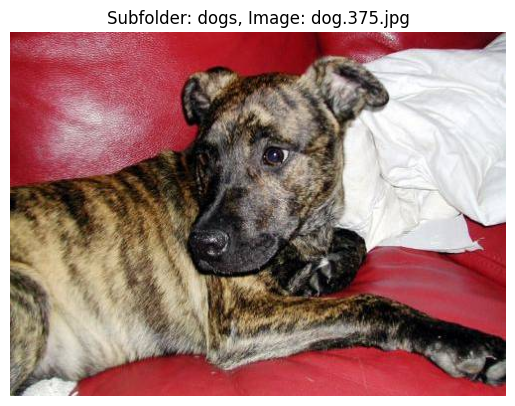

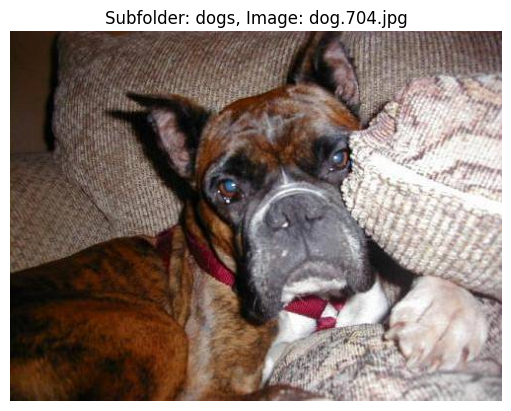

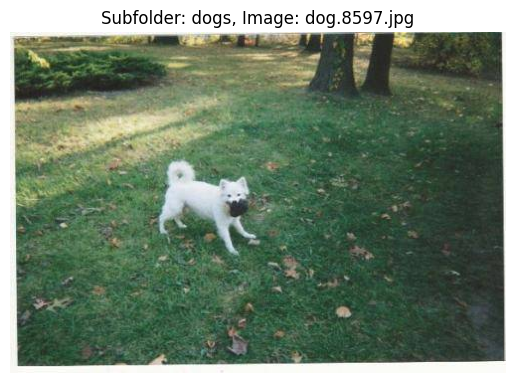

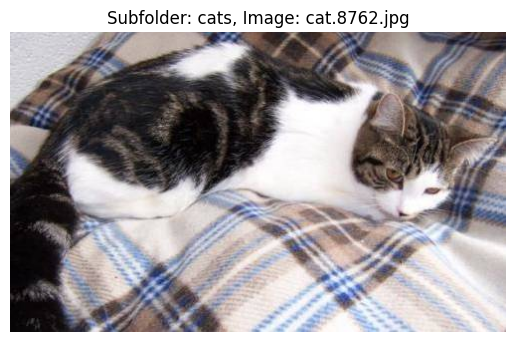

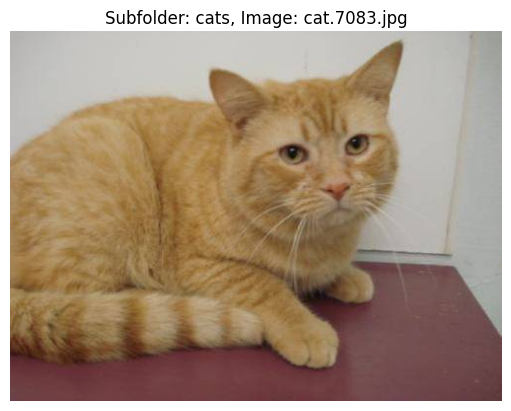

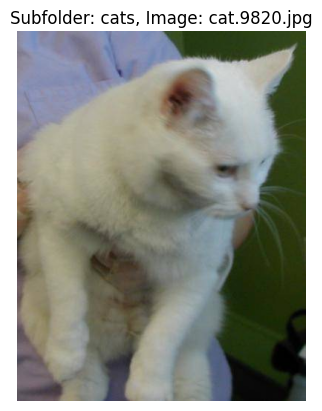

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the main folder
main_folder = '/kaggle/input/dogs-vs-cats/test'

# Display images from each subfolder
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        # Display images from the subfolder
        for image_file in os.listdir(subfolder_path)[:3]:
            image_path = os.path.join(subfolder_path, image_file)
            image = mpimg.imread(image_path)
            plt.imshow(image)
            plt.title(f'Subfolder: {subfolder}, Image: {image_file}')
            plt.axis('off')
            plt.show()


**Data Normalization**

In [15]:
# Normalizing the data
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
import os

# Get the directory path from the DirectoryIterator object
dataset_path = '/kaggle/input/dogs-vs-cats/train'

# Count the number of subdirectories (classes)
num_classes = len([name for name in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, name))])

print("Number of classes:", num_classes)

Number of classes: 2


In [17]:
from tensorflow.keras.applications import VGG16 ,Xception

conv_base = Xception(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [18]:
conv_base.trainable = False


In [19]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

**Compiling the model**

In [21]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [23]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)


print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 307s 10s/step - accuracy: 0.9880 - loss: 0.0356
Validation Loss: 0.04191915690898895
Validation Accuracy: 0.9860000014305115
